**6.1 Жизненный цикл графика matplotlib**

План модуля
* Жизненный цикл визуализации matplolib
* ООП к построению графиков в matplotlib
* Визуализация нескольких графиков
* Стилизация графиков matplotlib

Этапы построения визуализации
* Инициализация графика
* Добавление данных
* Настройка графика
* Вывод визуализации

In [80]:
!pip install seaborn

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("wage-data-coast.csv")
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


Text(0, 0.5, 'Минимальная з/п, $/час')

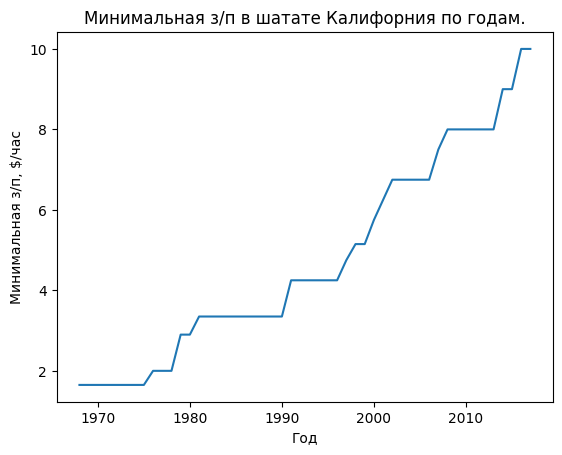

In [3]:
data = df[df["State"] == "California"][["Year", "Salary"]].set_index("Year")
plt.plot(data)
plt.title('Минимальная з/п в шатате Калифорния по годам.')
plt.xlabel('Год')
plt.ylabel('Минимальная з/п, $/час')

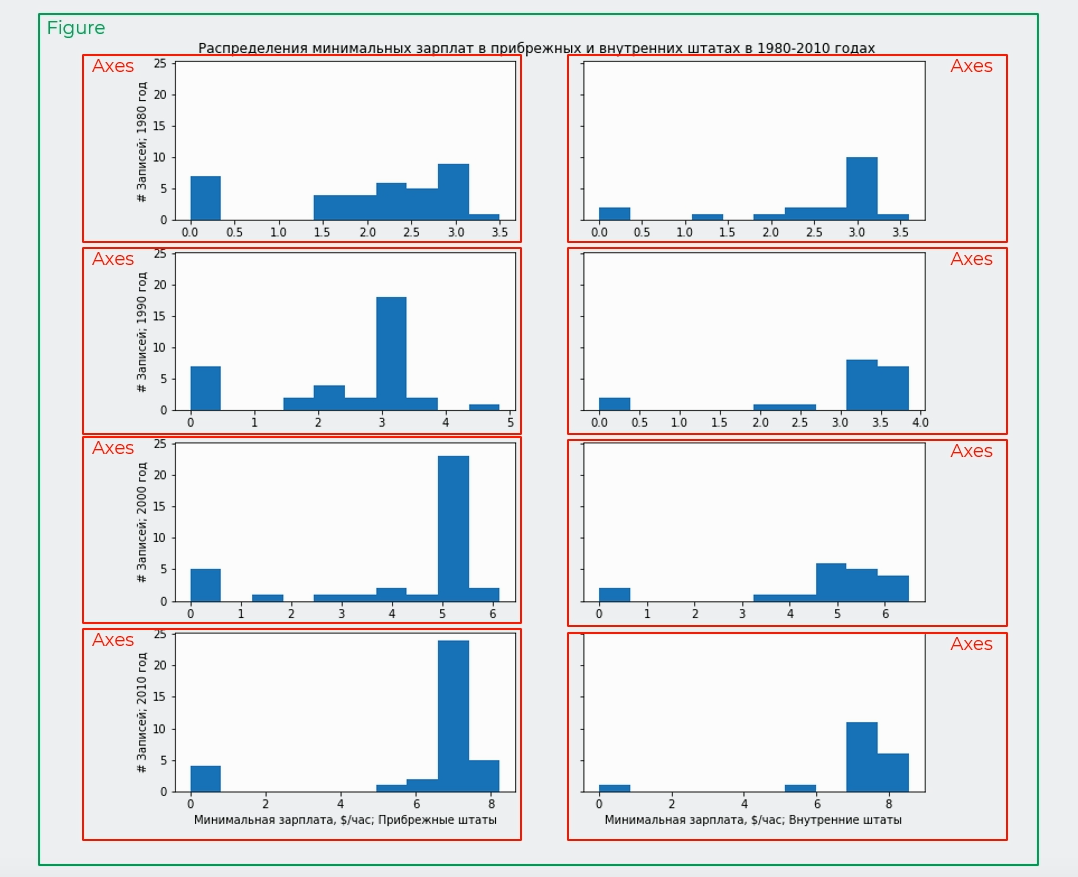

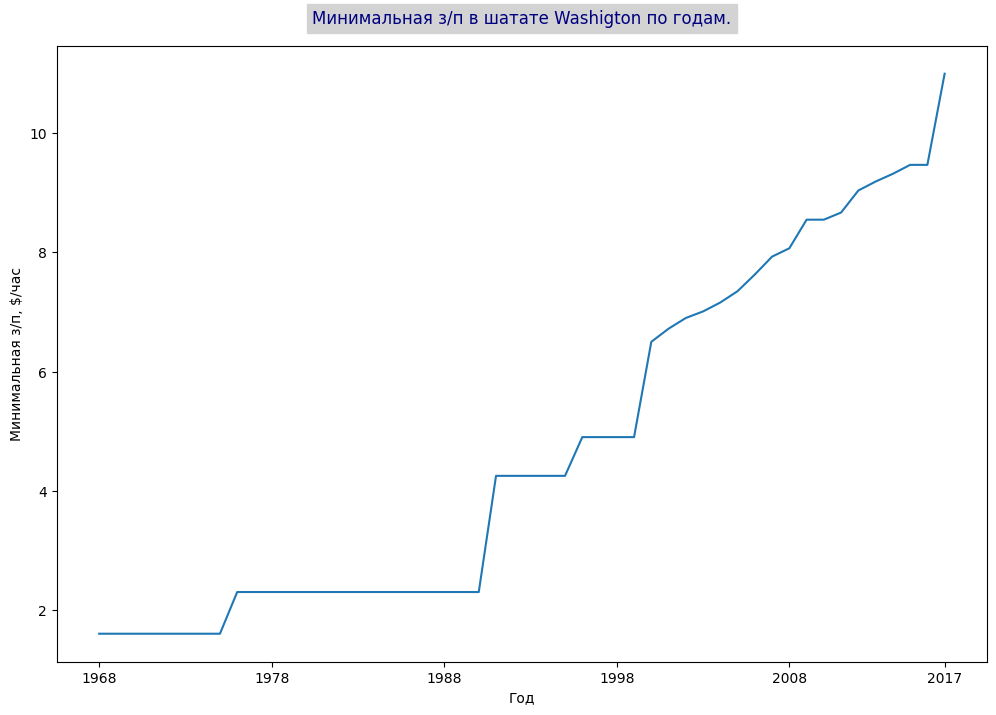

In [4]:
data = df[df["State"] == "Washington"][["Year", "Salary"]]
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(data['Year'], data['Salary'], label='Washigton')

ax.set_title('Минимальная з/п в шатате Washigton по годам.', pad=16, color = 'navy', backgroundcolor='lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная з/п, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 10)) + [data['Year'].max()])

plt.show()

**6.2 Визуализация в цикле, несколько графиков на одной координатной сетке**
План
* Разбор практического задания 
* Вывод графиков в одной координатной сетке
* Вывод графиков в цикле

Text(0, 0.5, 'Минимальная зп, $/час')

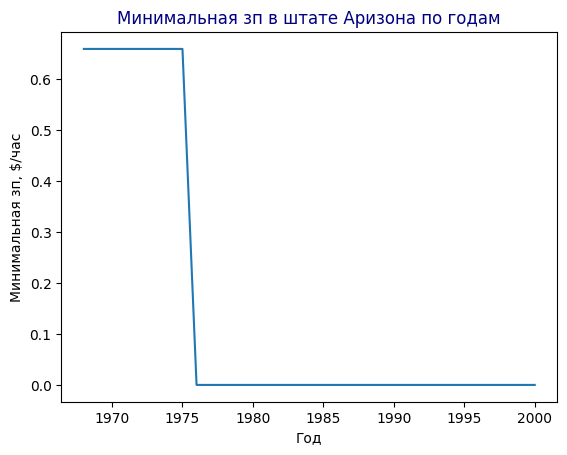

In [5]:
data = df[(df['State'] == 'Arizona') & (df['Year'] <= 2000)][['Year', 'Salary']]

fig, ax = plt.subplots()
ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зп в штате Аризона по годам', color = 'navy')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зп, $/час')

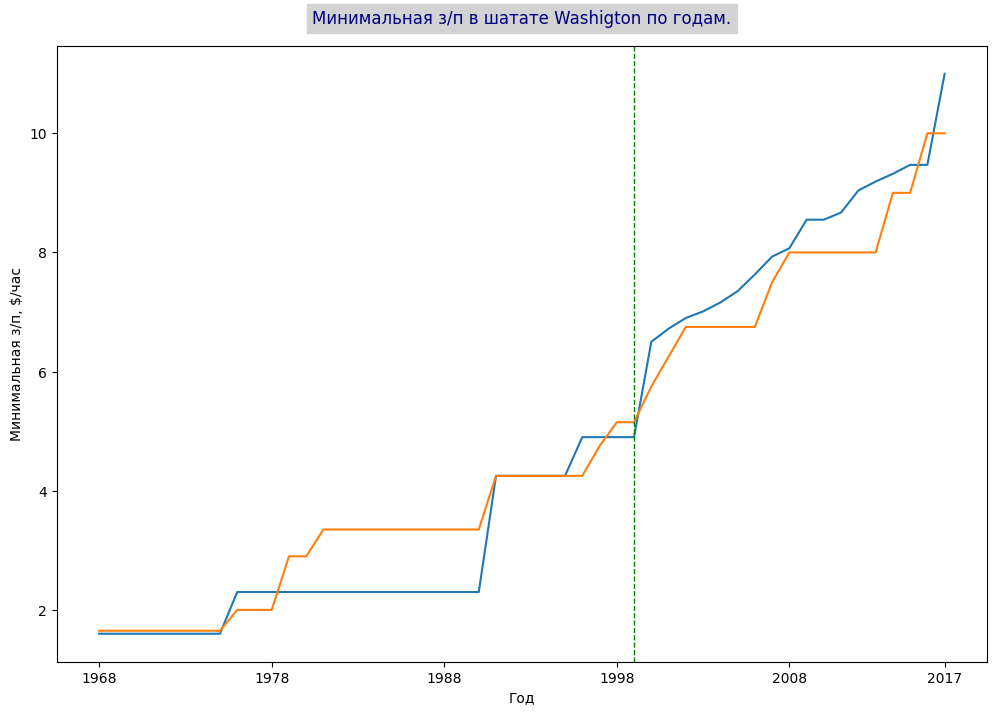

In [6]:
data = df[df["State"] == "Washington"][["Year", "Salary"]]
data1 = df[df["State"] == "California"][["Year", "Salary"]]
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(data['Year'], data['Salary'], label='Washigton')
ax.plot(data1['Year'], data1['Salary'], label='California')
ax.axvline(x=1999, color='g', linewidth=1, linestyle='--')
ax.set_title('Минимальная з/п в шатате Washigton по годам.', pad=16, color = 'navy', backgroundcolor='lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная з/п, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 10)) + [data['Year'].max()])

plt.show()

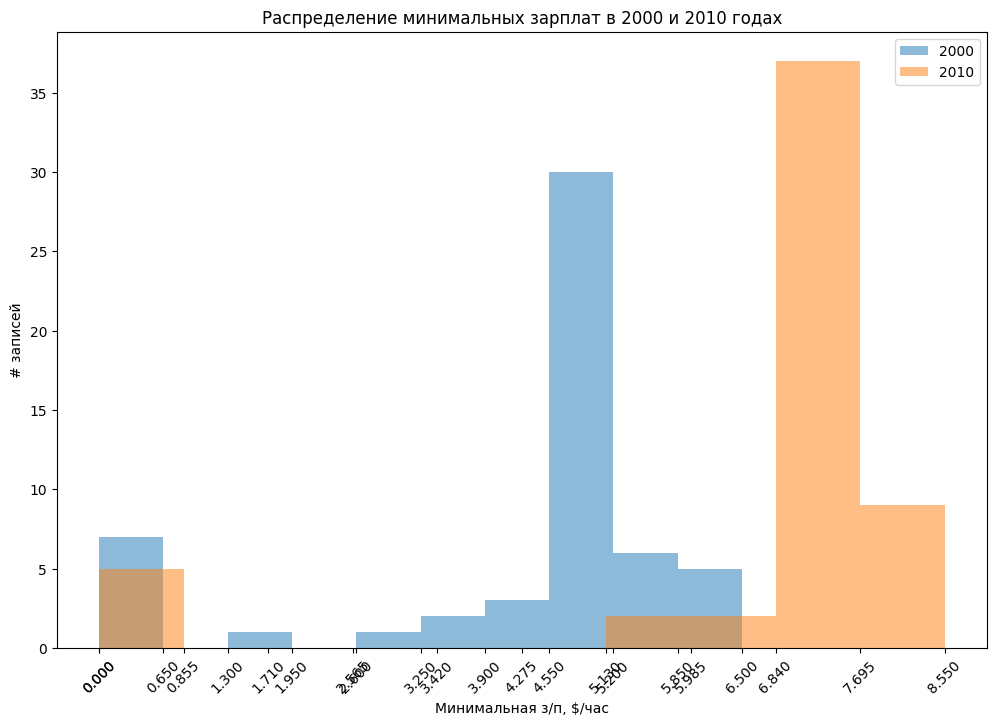

In [7]:
data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

fig, ax = plt.subplots(figsize=(12, 8))
_, bins, _ = ax.hist(data, label='2000', alpha = 0.5)
_, bins1, _ = ax.hist(data1, label='2010', alpha = 0.5)

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная з/п, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins) + list(bins1))
ax.tick_params(axis='x', rotation = 45)

ax.legend()
plt.show()

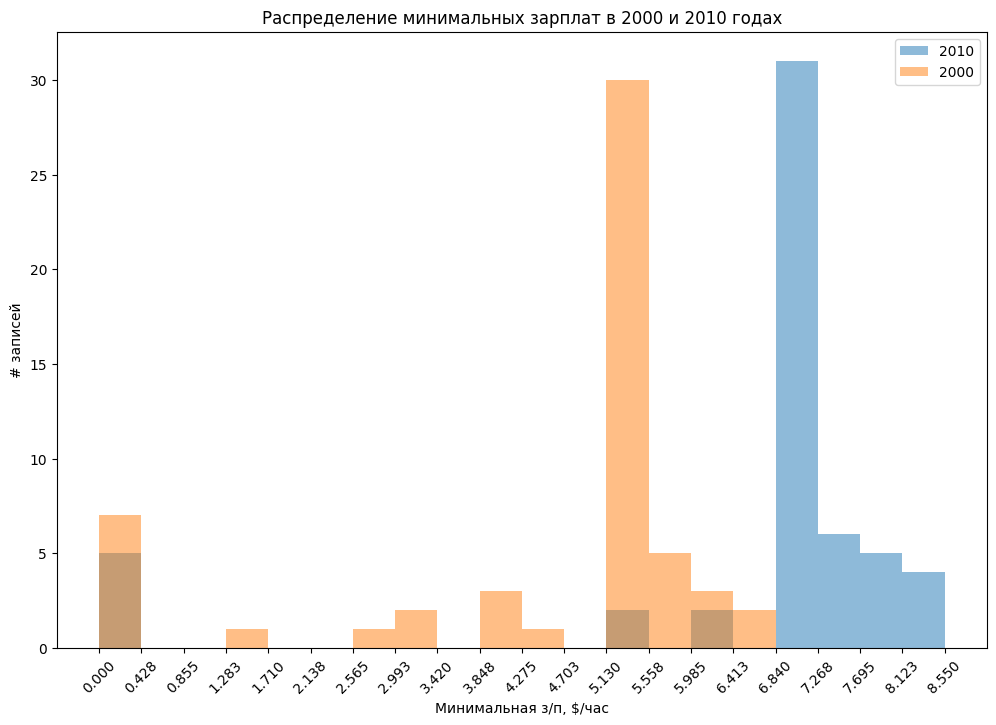

In [8]:
data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

fig, ax = plt.subplots(figsize=(12, 8))
_, bins1, _ = ax.hist(data1, label='2010', alpha = 0.5, bins=20)
ax.hist(data, label='2000', alpha=0.5, bins=bins1)
ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная з/п, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins1))
ax.tick_params(axis='x', rotation = 45)

ax.legend()
plt.show()

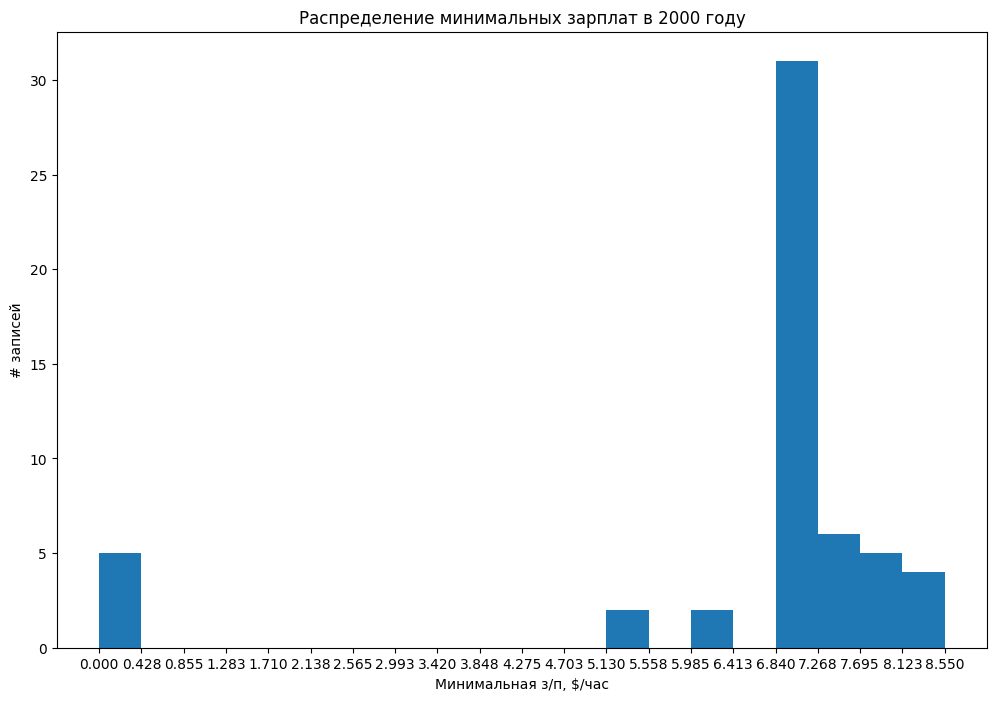

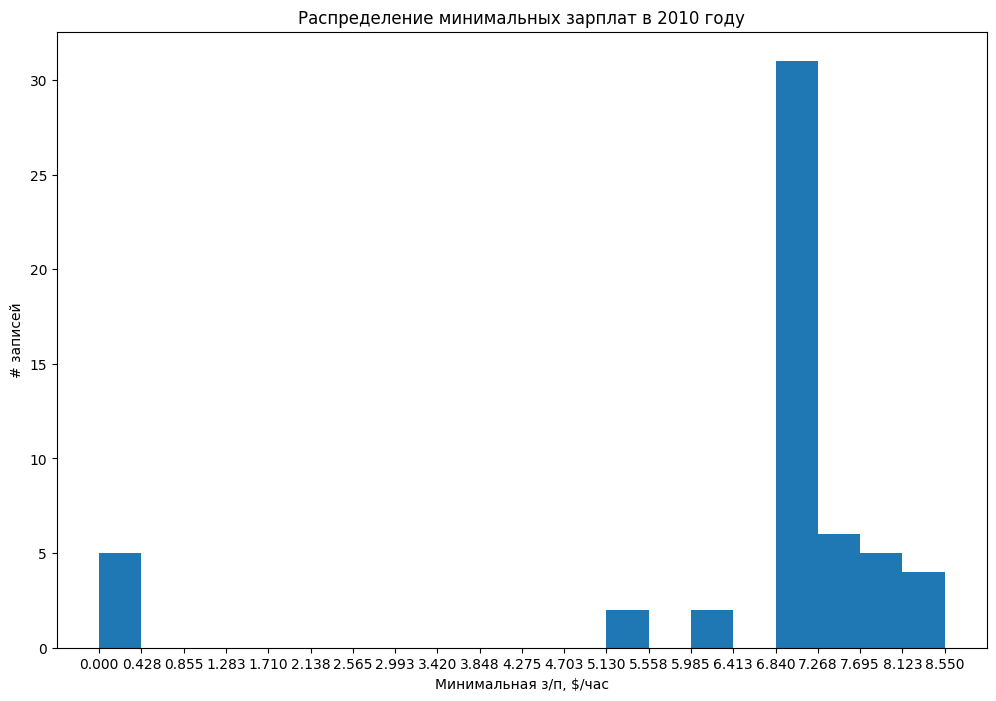

In [9]:
for year in [2000,2010]:
    data = df[df['Year'] == year]['Salary']

    fig, ax = plt.subplots(figsize=(12, 8))
    _, bins1, _ = ax.hist(data1, label=str(year),  bins=20)
    
    ax.set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
    ax.set_xlabel('Минимальная з/п, $/час')
    ax.set_ylabel('# записей')
    ax.set_xticks(list(bins1))

    plt.show()

**Урок 2. Визуализация в цикле, несколько графиков на одной координатной сетке**<br>
Практика<br>
Задание 1<br>
Сравните распределения минимальных зарплат в 1980, 1990 и 2000 годах, построив 3 графика на одной координатной сетке. При постройке графиков на одной координатной сетке убедитесь, что столбцы всех трех графиков имеют одинаковую ширину столбцов, и все 3 графика одновременно видно.

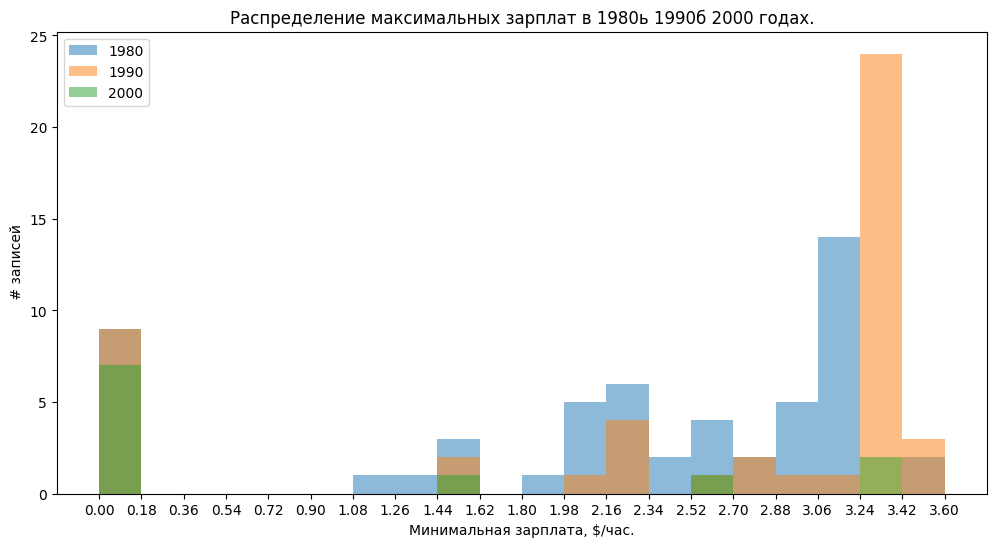

In [17]:
data = df[df['Year'] == 1980]['Salary']
data1 = df[df['Year'] == 1990]['Salary']
data2 = df[df['Year'] == 2000]['Salary']

fig, ax = plt.subplots(figsize=(12, 6))

_, bins, _ = ax.hist(data, label='1980', alpha=0.5, bins=20)
ax.hist(data1, label='1990', alpha=0.5, bins=bins)
ax.hist(data2, label='2000', alpha=0.5, bins=bins)

ax.set_title('Распределение максимальных зарплат в 1980ь 1990б 2000 годах.')
ax.set_xlabel('Минимальная зарплата, $/час.')
ax.set_ylabel(' # записей')
ax.set_xticks(bins)

ax.legend()

**6.3 Несколько графиков на одном полотне**

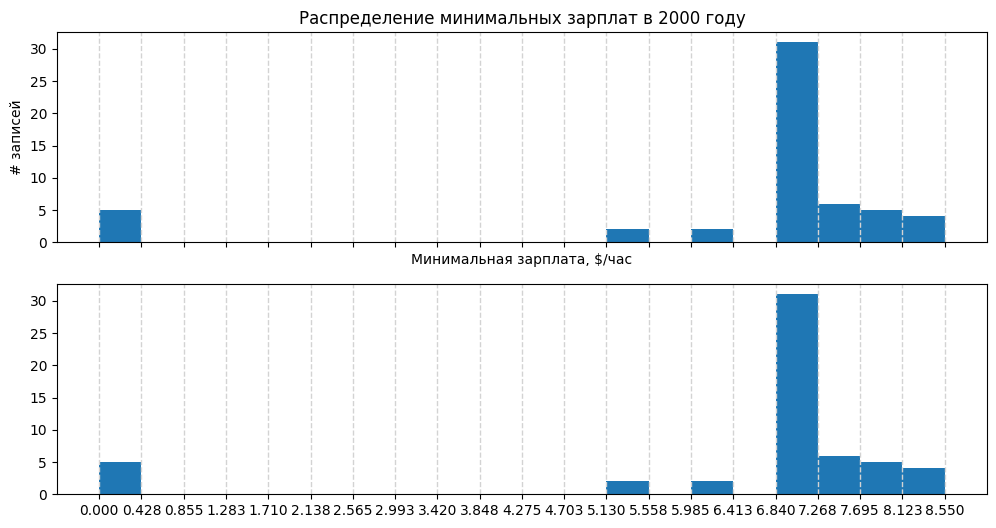

In [34]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex=True, figsize=(12,6))

data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

_, bins, _ = axs[0].hist(data1, bins = 20)
axs[1].hist(data1, bins = bins)
axs[0].set_title('Распределение минимальных зарплат в 2000 году')
axs[0].set_xlabel('Минимальная зарплата, $/час')
axs[0].set_ylabel('# записей')
for ax in axs:
    ax.set_xticks(bins)
    
    for bin_ in bins:
        ax.axvline(x=bin_, color='lightgray', linewidth=1, linestyle = '--')
    
plt.show()

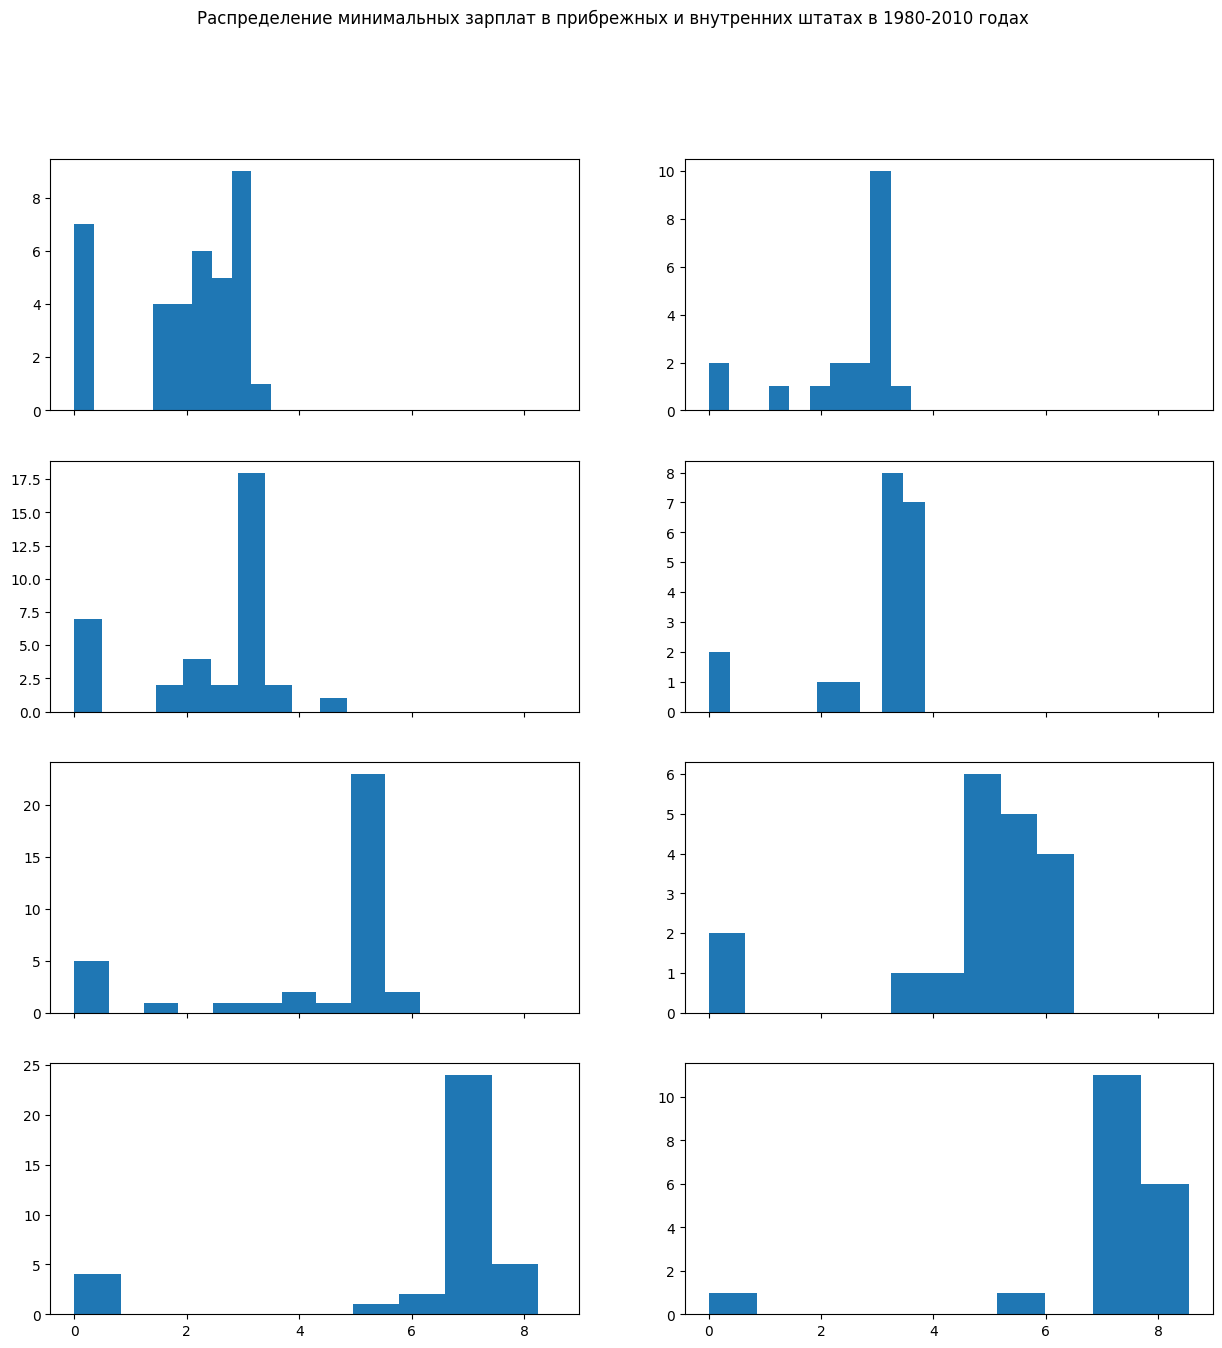

In [47]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex=True, figsize=(15,15))

years=[1980, 1990, 2000, 2010]
is_coastal=[0,1]

for i, year in enumerate(years):
    for j, is_c in enumerate(is_coastal):
        data = df[(df['Year'] == year) & (df['IsCoastal'] == is_c)]['Salary']
        axs[i][j].hist(data)
        ax.hist(data)
        
        if i == len(years) - 1:
            state_type = 'Внутренние' if is_c == 0 else 'Прибрежные'
        
            ax.set_xlabel('Минимальная зарплата, $/час' + state_type + ' штаты')
            
        if j == 0:
            
            ax.set_ylabel('# записей' + str(year) + 'Год')

fig.suptitle('Распределение минимальных зарплат в прибрежных и внутренних штатах в 1980-2010 годах')
plt.show()

**Урок 3. Несколько графиков на одном полотне**<br>
Практика<br>
Задание 1<br>
Постройте на одном полотне 3 линейных графика изменения минимальной зарплаты в штатах Аляска, Калифорния и Вашингтон. Графики расположите друг под другом.

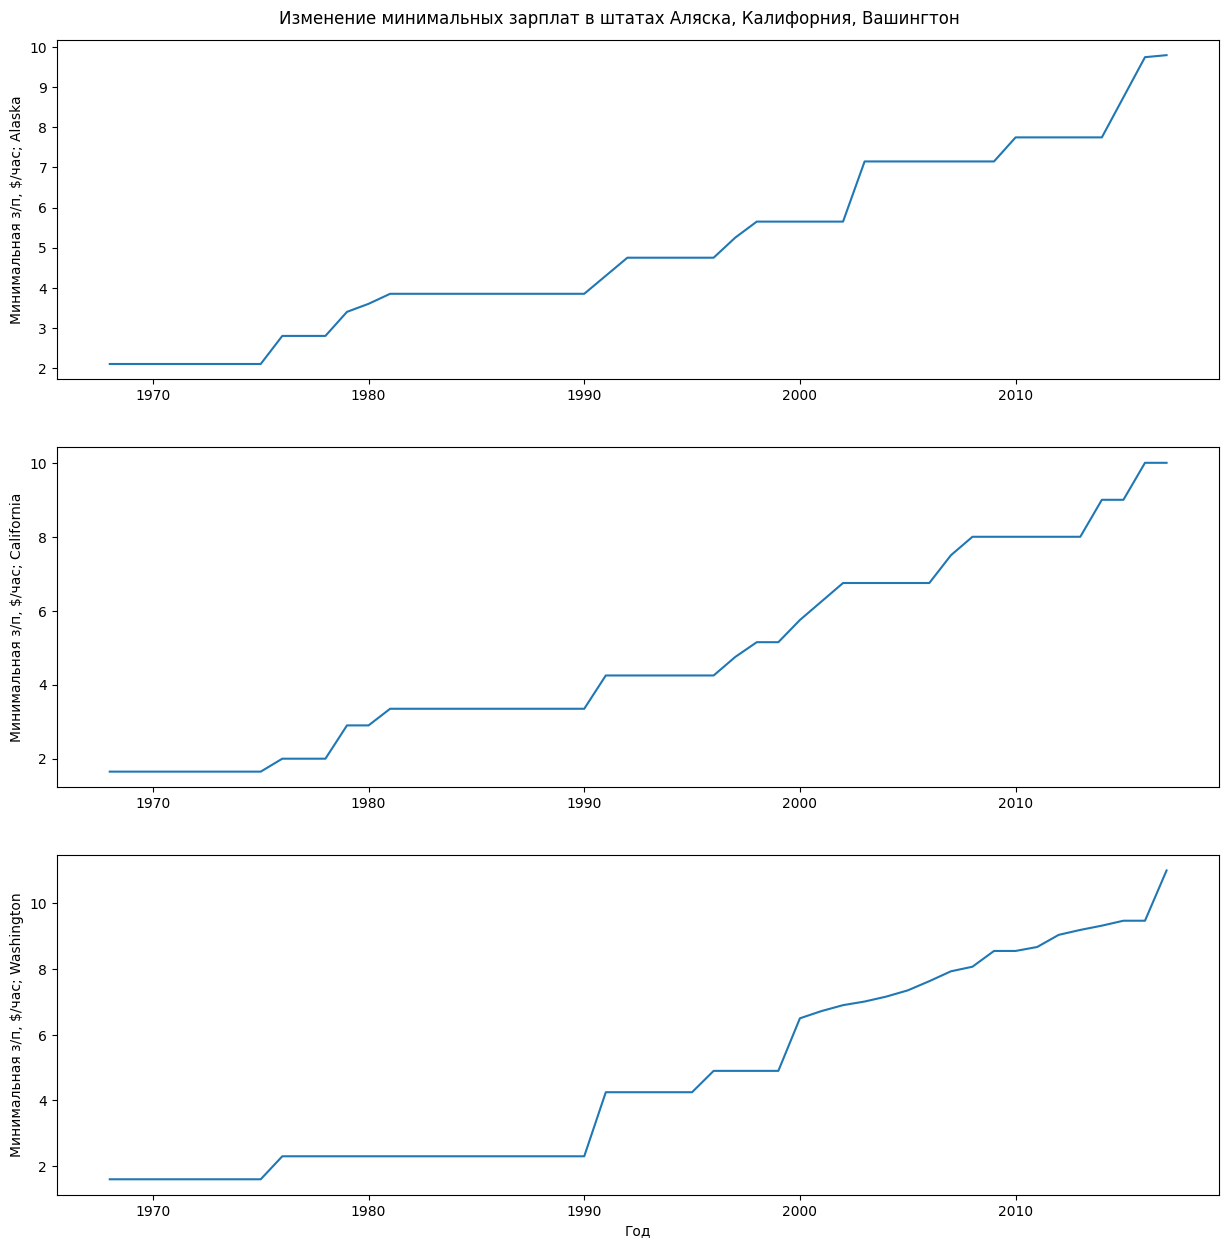

In [51]:
fig, axs = plt.subplots(nrows=3, ncols = 1, figsize=(15,15))

for i,state in enumerate(['Alaska', 'California', 'Washington']):
    data = df[df['State'] == state][['Year', 'Salary']]
    ax = axs[i]
    ax.plot(data['Year'], data['Salary'])
    
    ax.set_ylabel('Минимальная з/п, $/час; ' + state)
    
    if i == 2:
        ax.set_xlabel('Год')
        
fig.suptitle('Изменение минимальных зарплат в штатах Аляска, Калифорния, Вашингтон', y = 0.9)
plt.show()

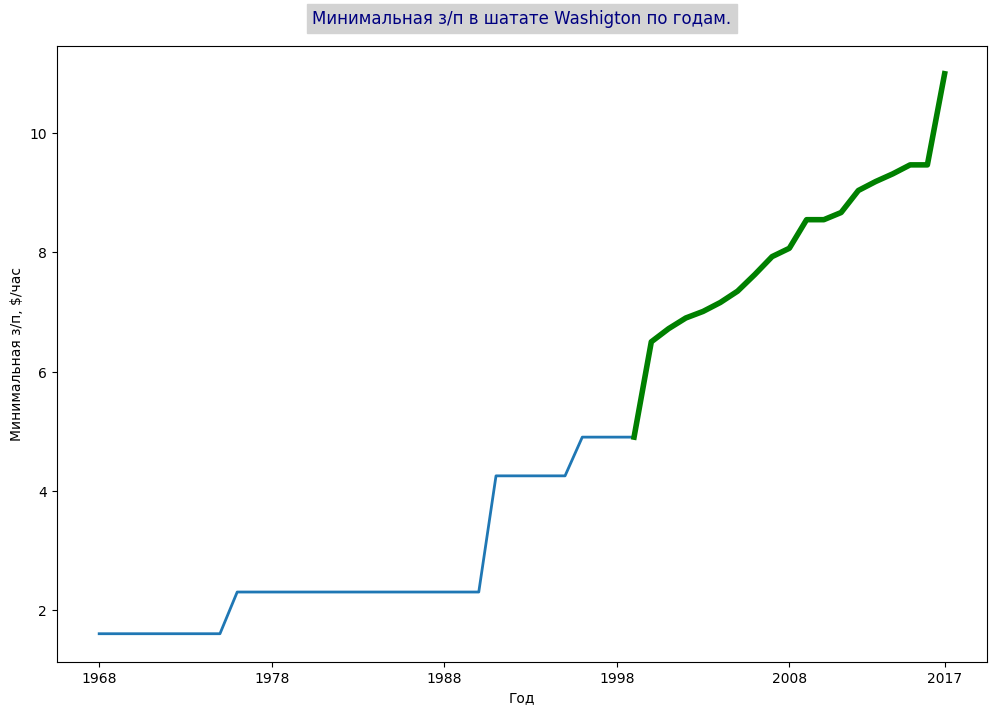

In [54]:
data = df[df["State"] == "Washington"][["Year", "Salary"]]
data1 = data[data['Year'] <= 1999]
data2 = data[data['Year'] >= 1999]
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(data1['Year'], data1['Salary'], linewidth=2)
ax.plot(data2['Year'], data2['Salary'], linewidth=4, color='green') 

ax.set_title('Минимальная з/п в шатате Washigton по годам.', pad=16, color = 'navy', backgroundcolor='lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная з/п, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 10)) + [data['Year'].max()])

plt.show()

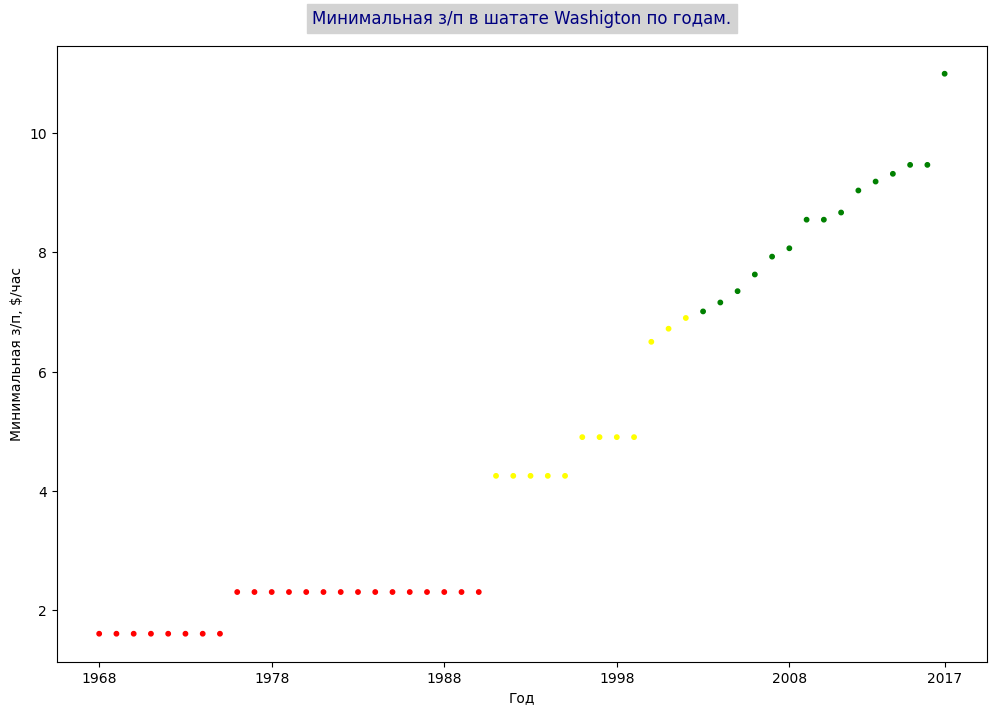

In [61]:
data = df[df["State"] == "Washington"][["Year", "Salary"]]
data['Color'] = 'green'
data.loc[data['Salary'] < 4, 'Color'] = 'red'
data.loc[(data['Salary'] >= 4) & (data['Salary'] < 7), 'Color'] = 'yellow'

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(data['Year'], data['Salary'], color=data['Color'], s=10)

ax.set_title('Минимальная з/п в шатате Washigton по годам.', pad=16, color = 'navy', backgroundcolor='lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная з/п, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 10)) + [data['Year'].max()])

plt.show()

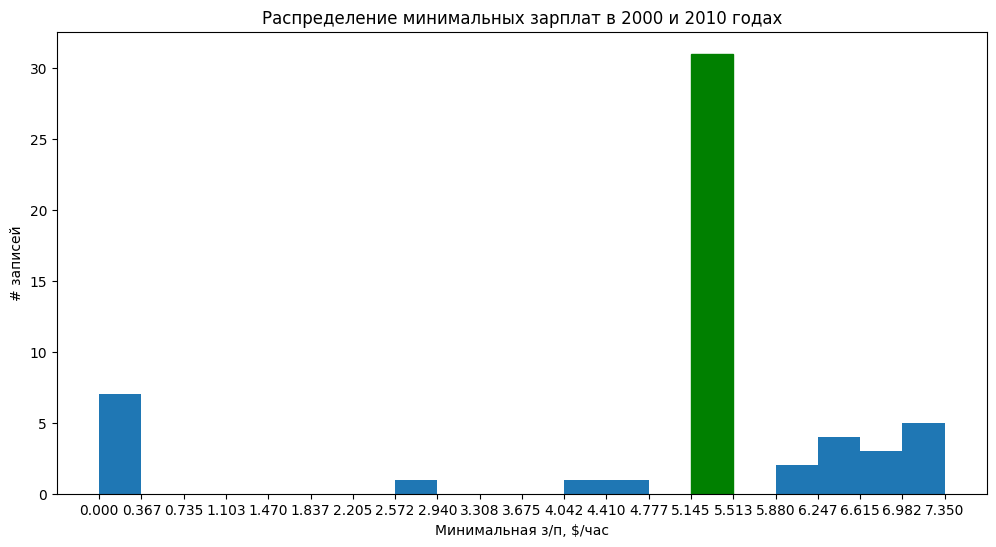

In [68]:
data = df[df['Year'] == 2005]['Salary']

fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(data, bins=20)
max_index = np.argmax(n)
patches.patches[max_index].set_color('green')

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная з/п, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)

plt.show()

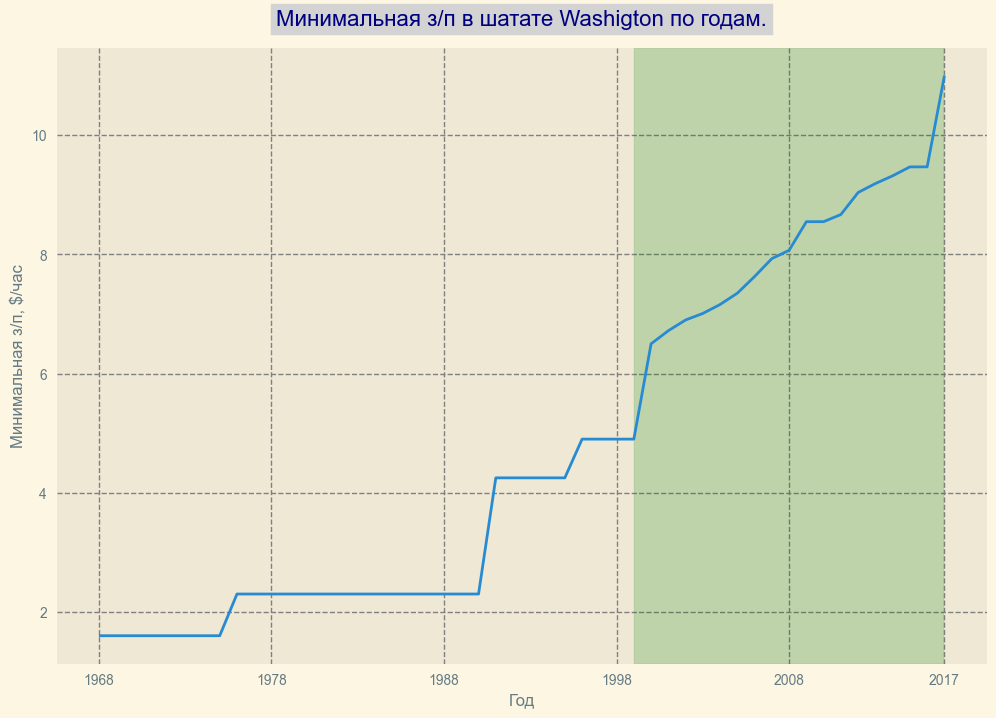

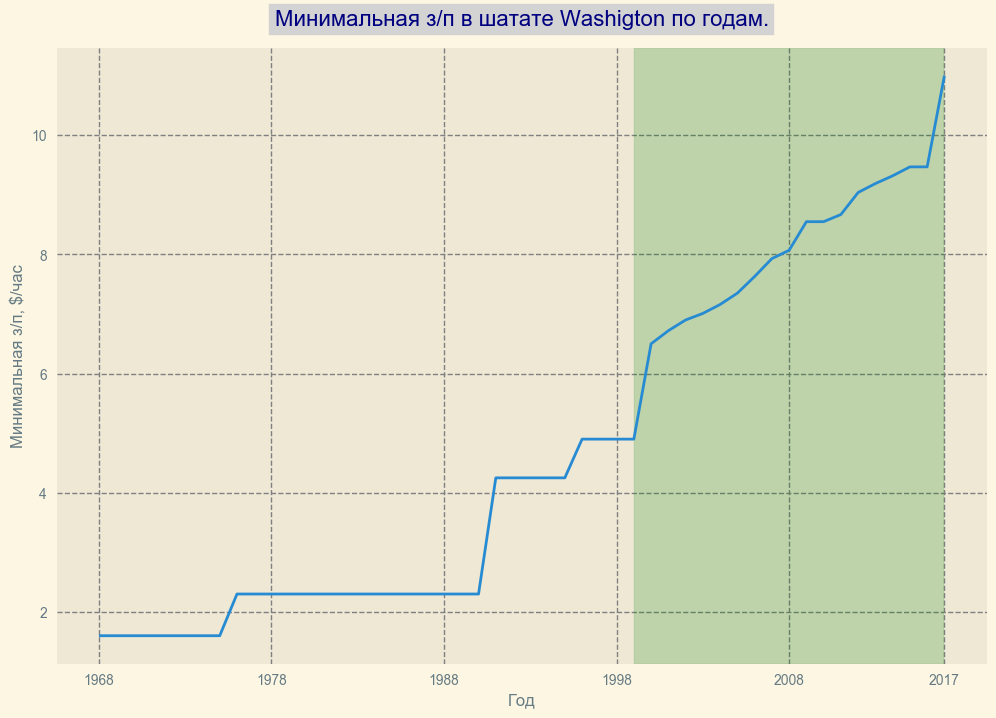

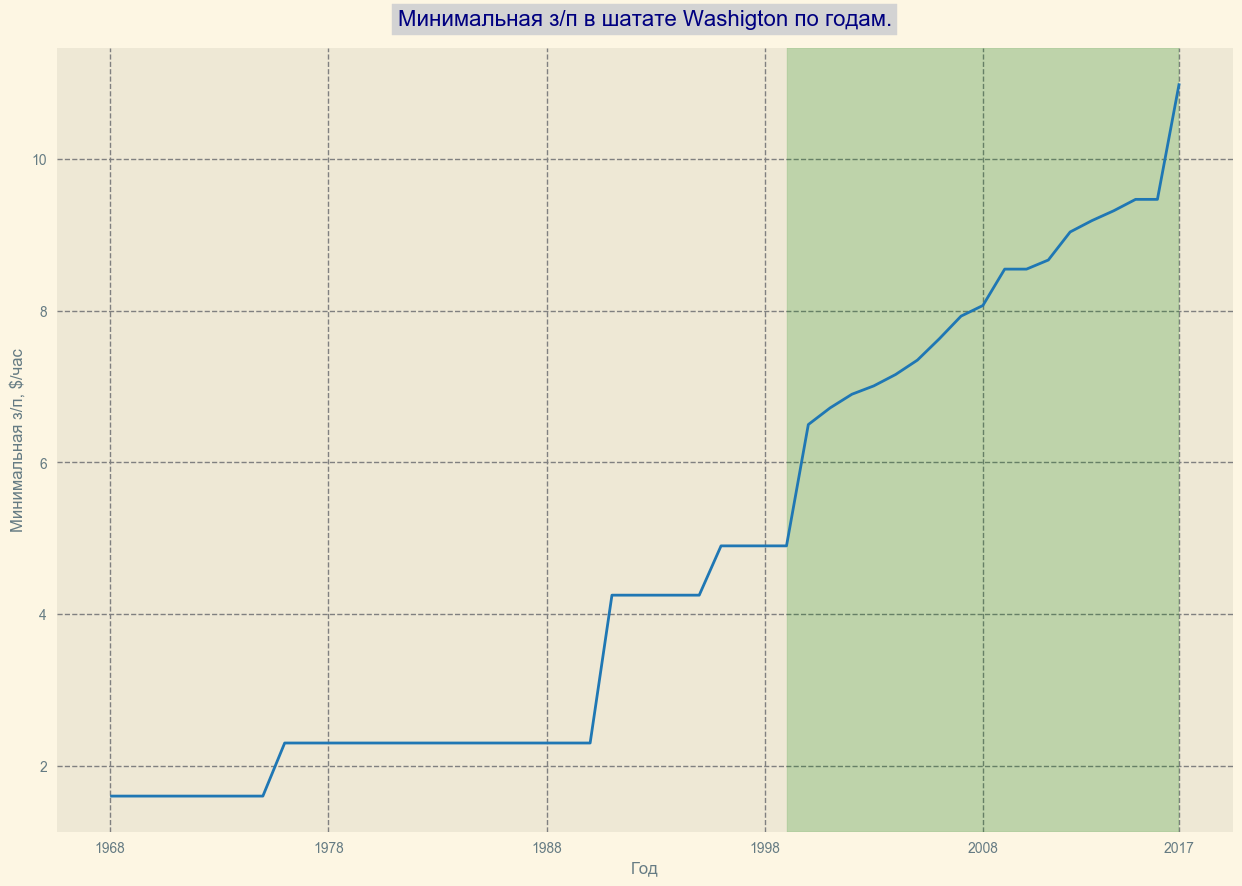

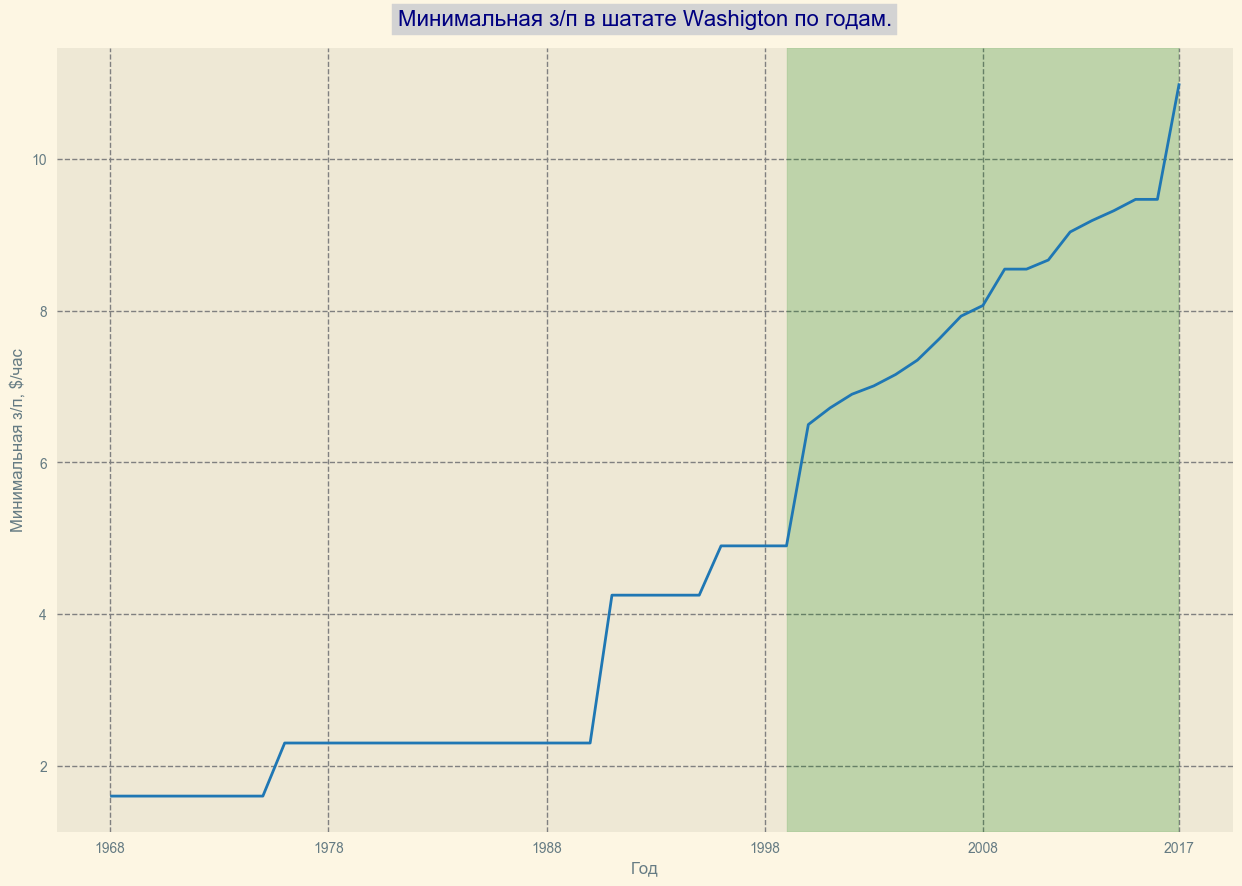

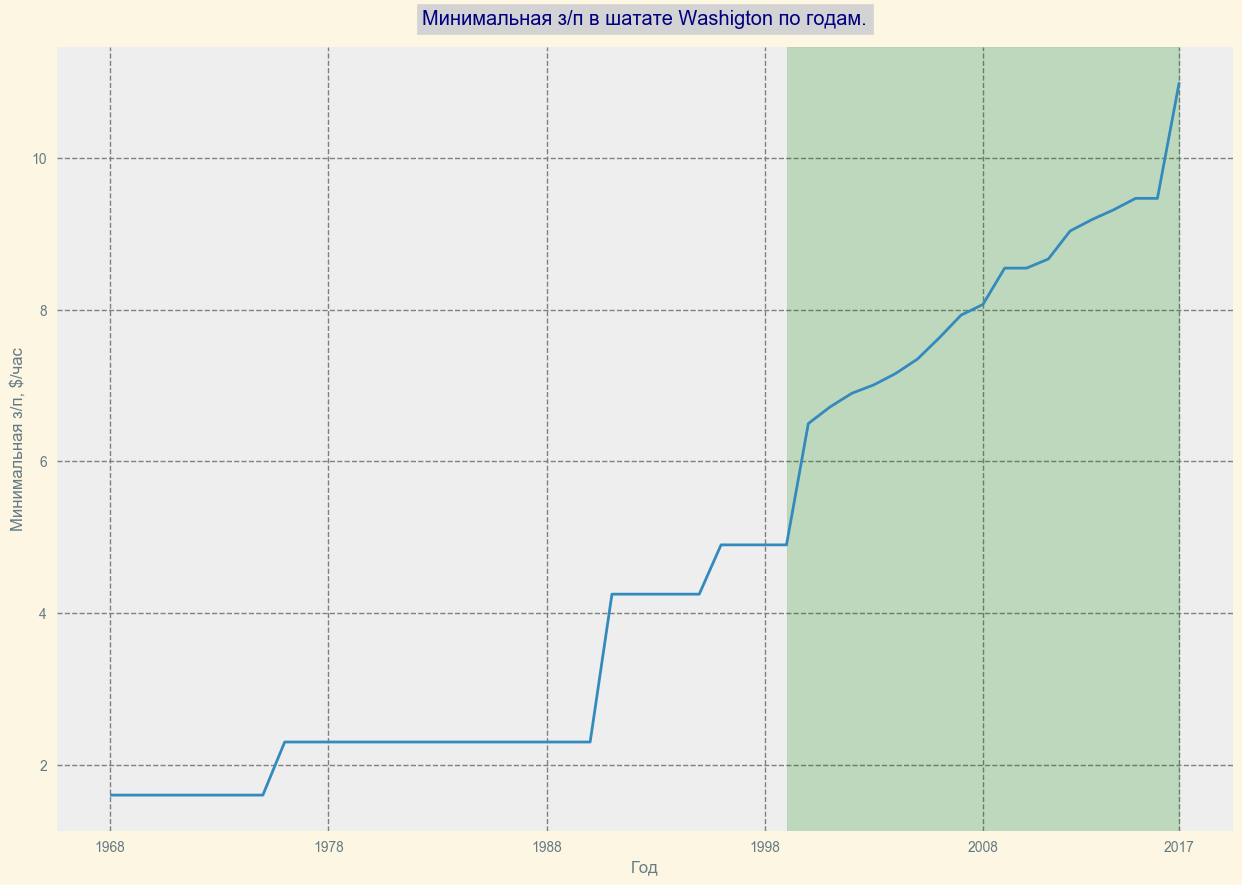

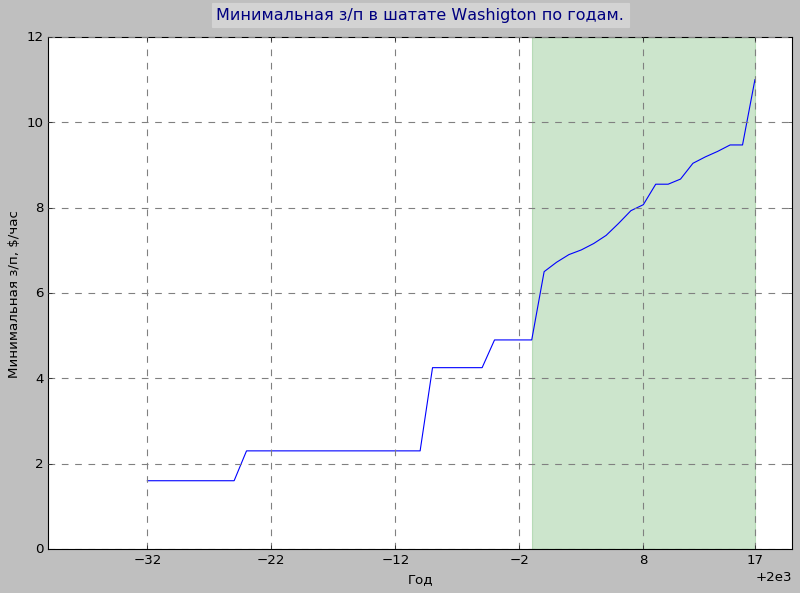

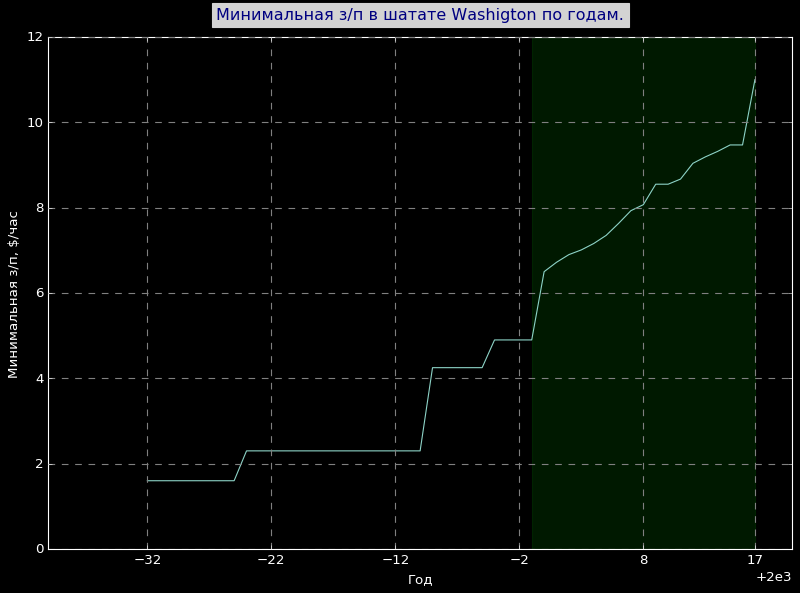

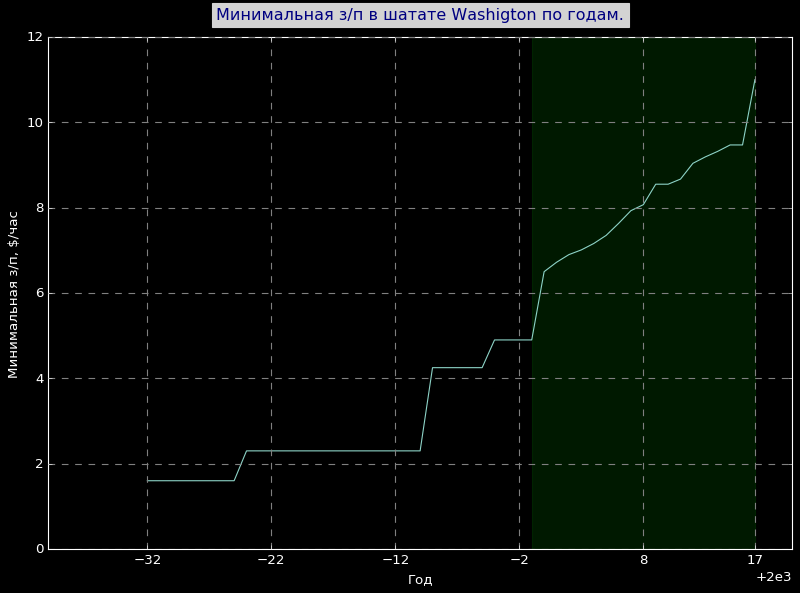

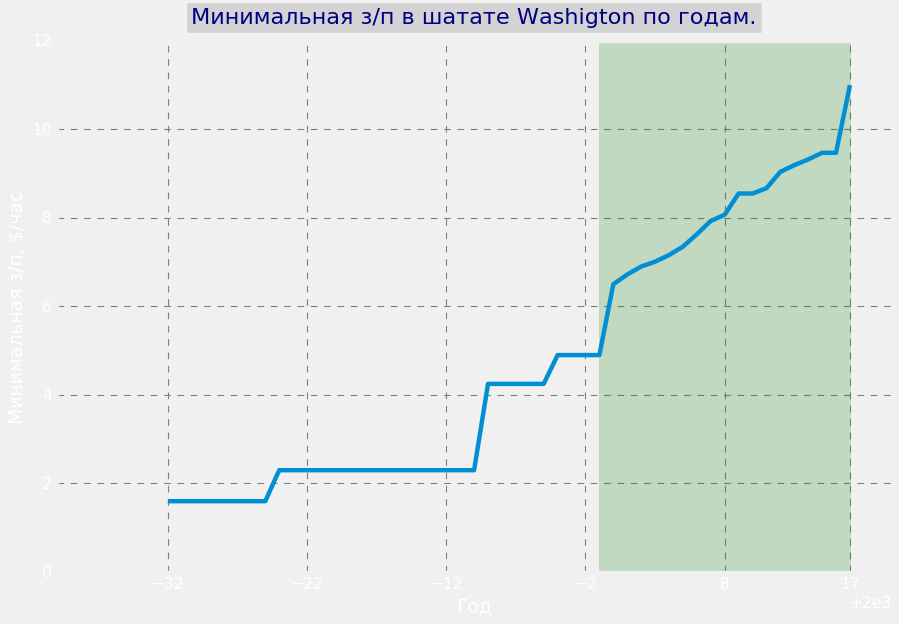

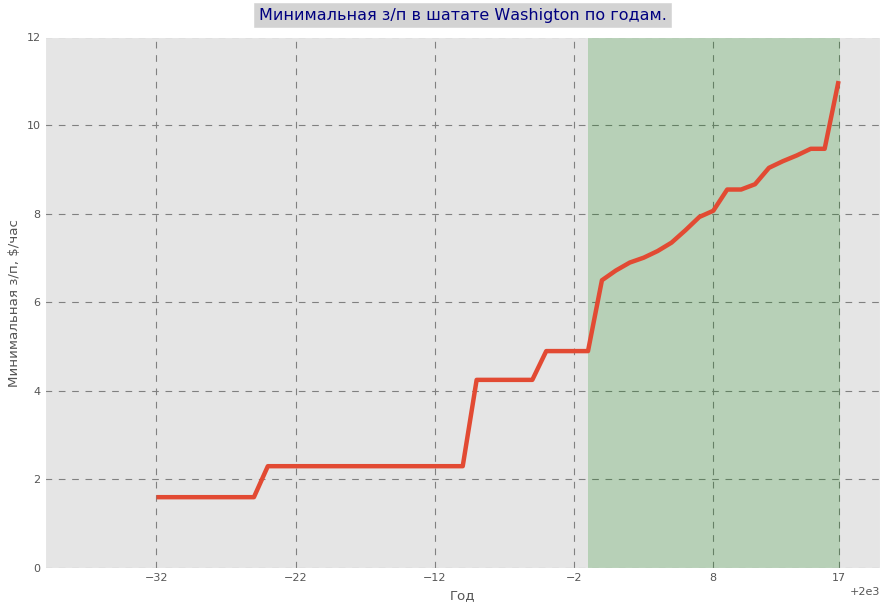

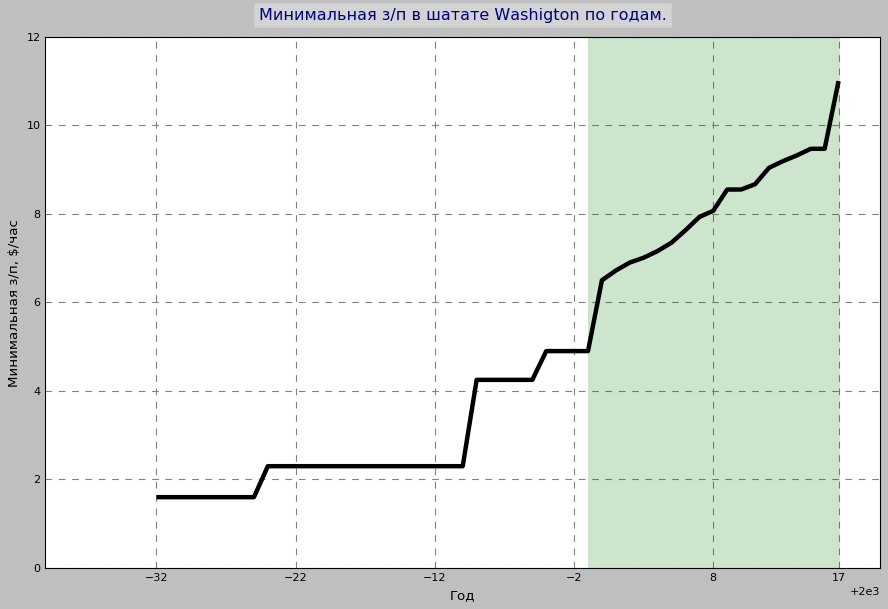

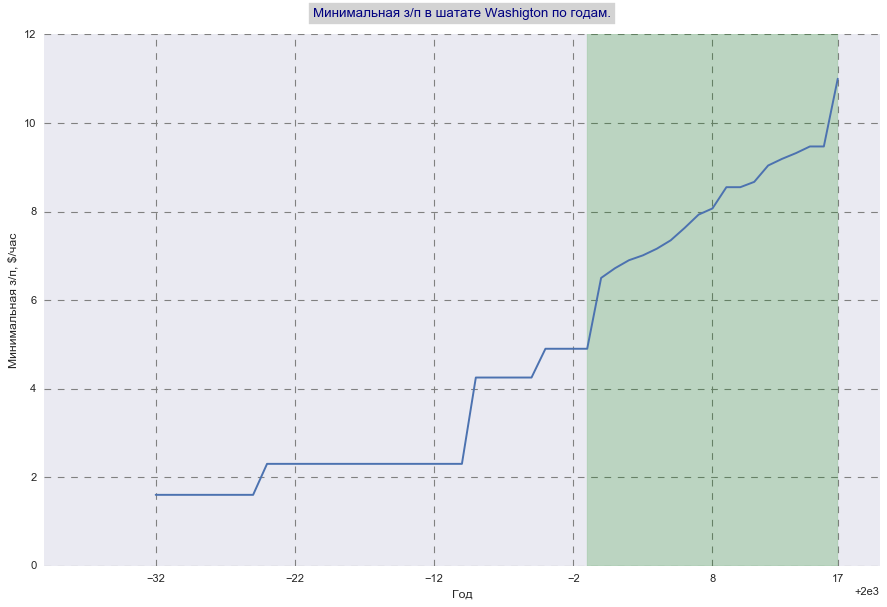

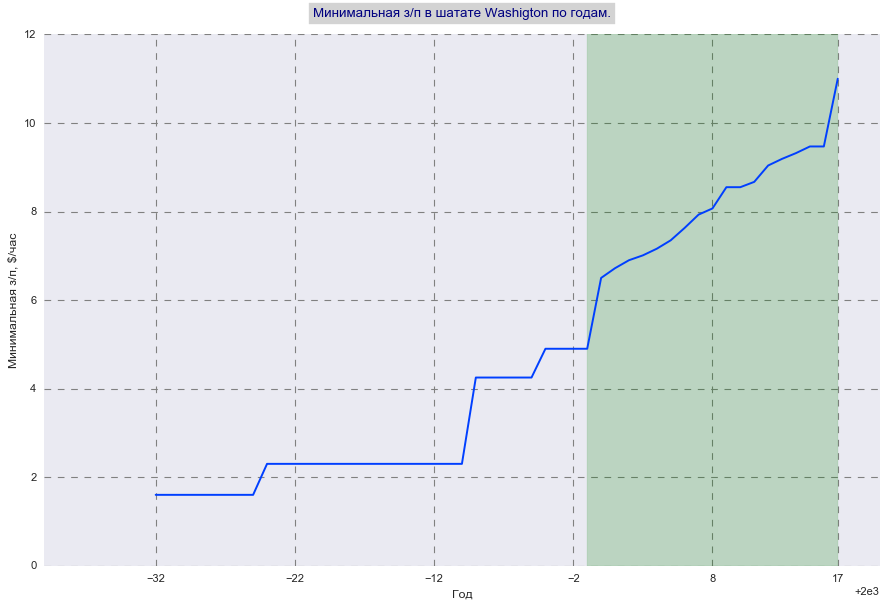

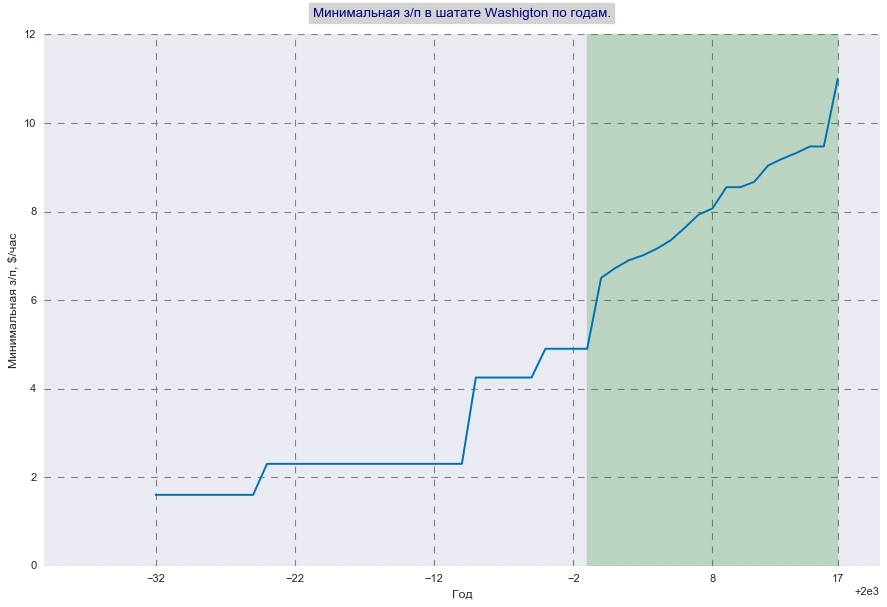

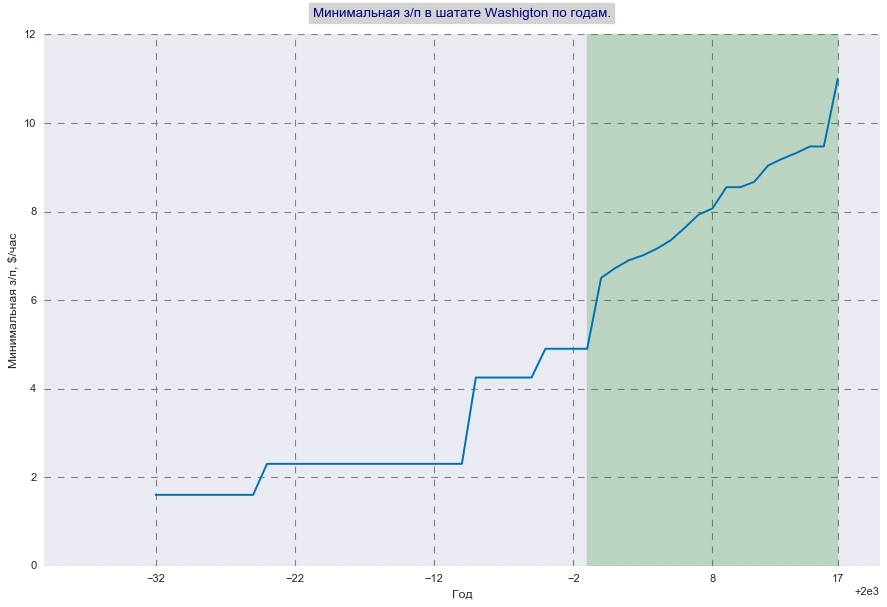

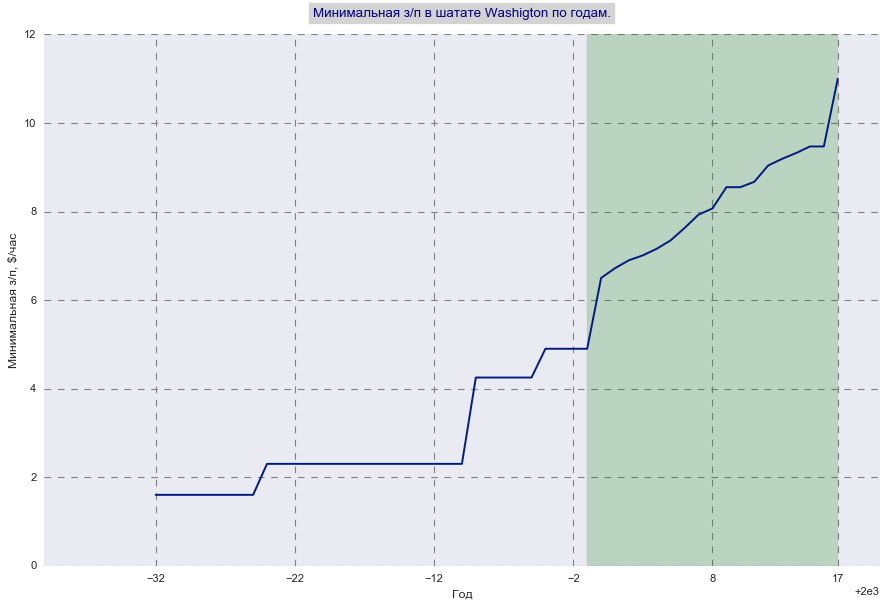

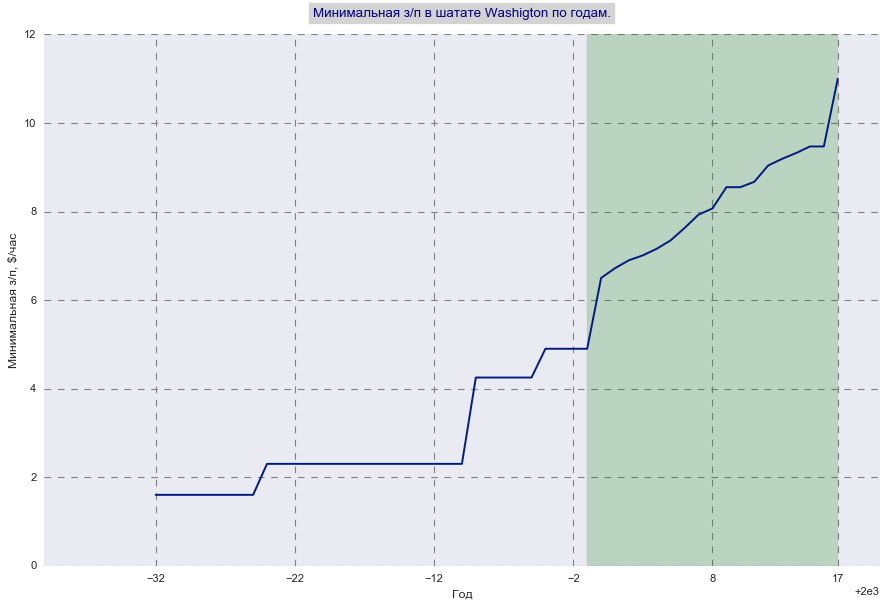

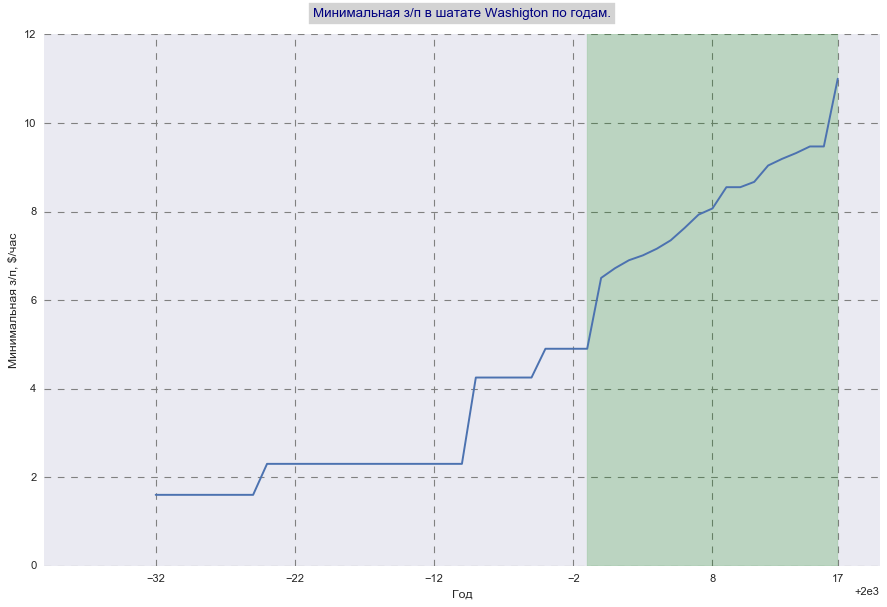

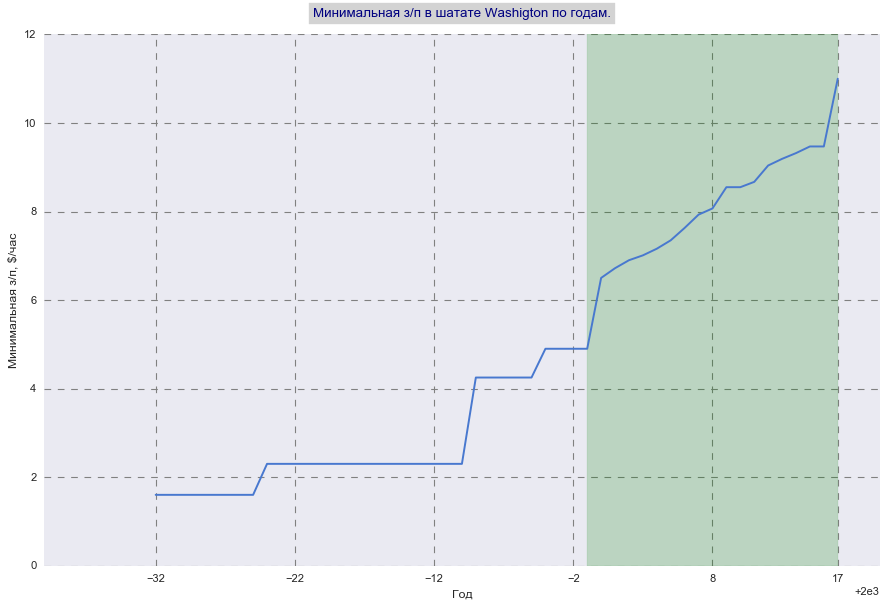

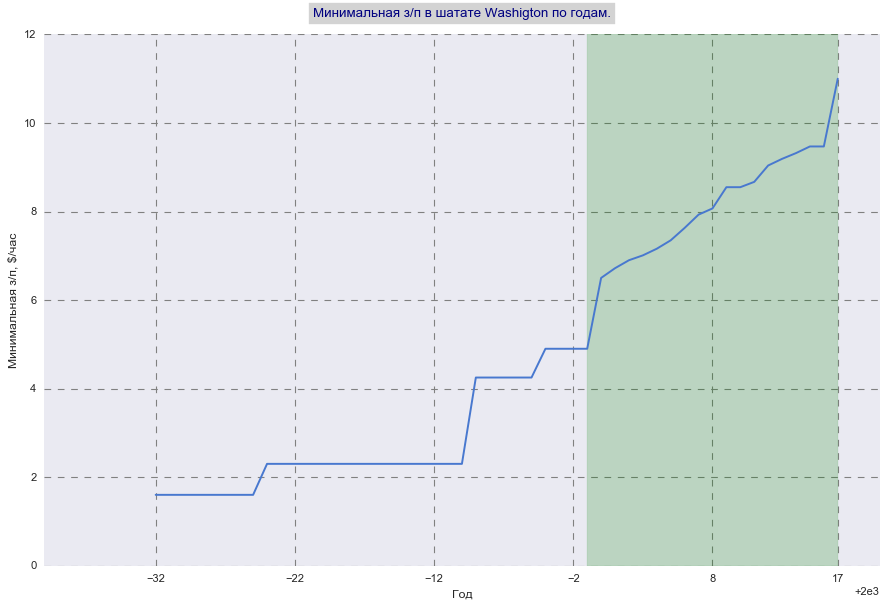

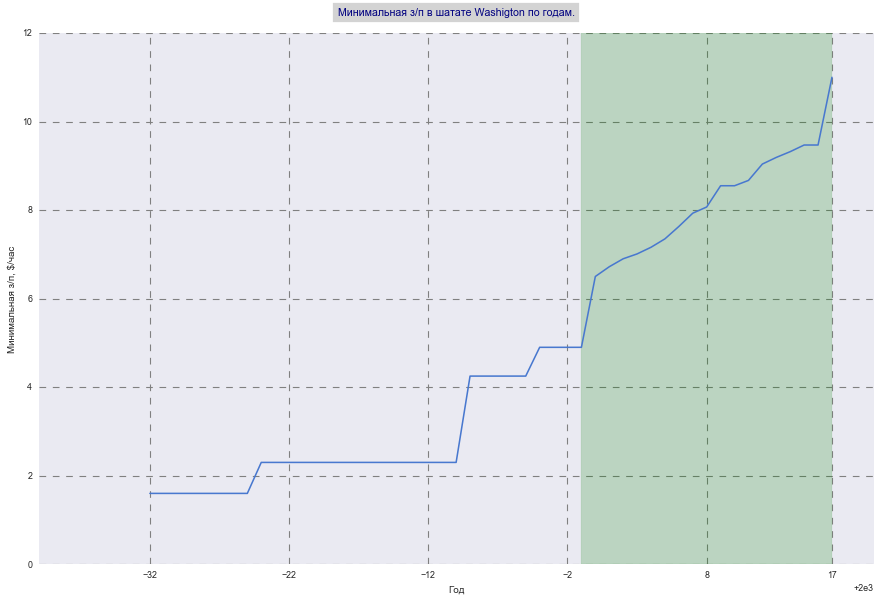

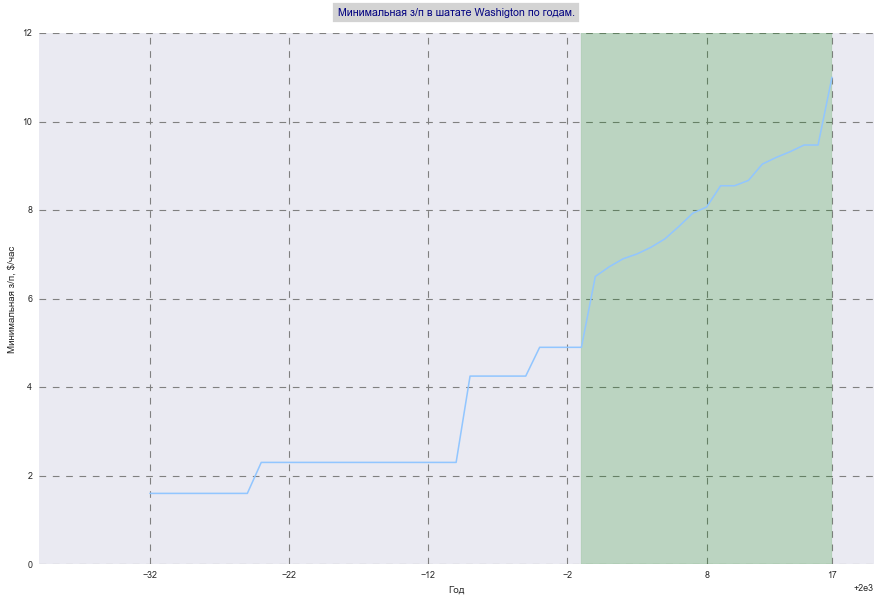

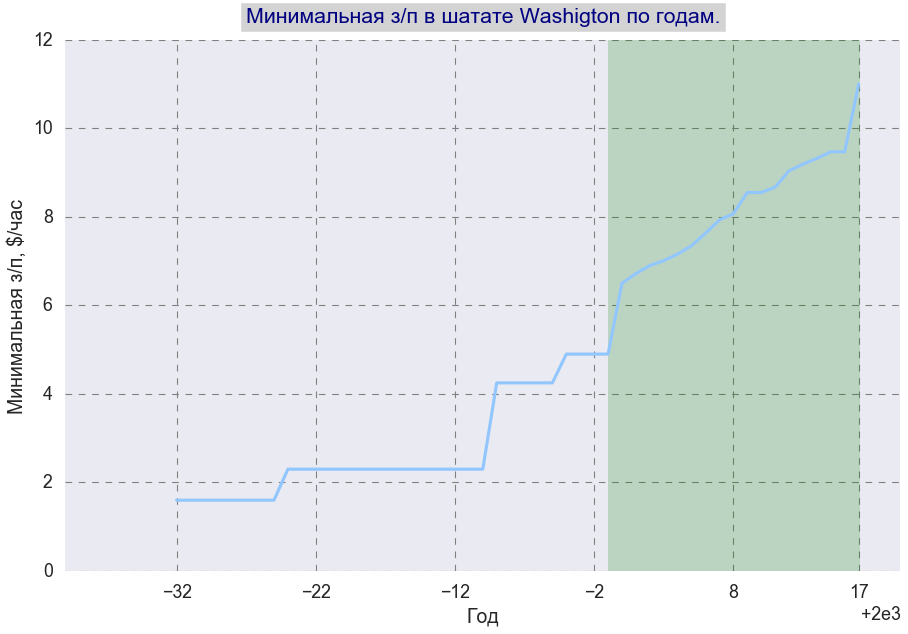

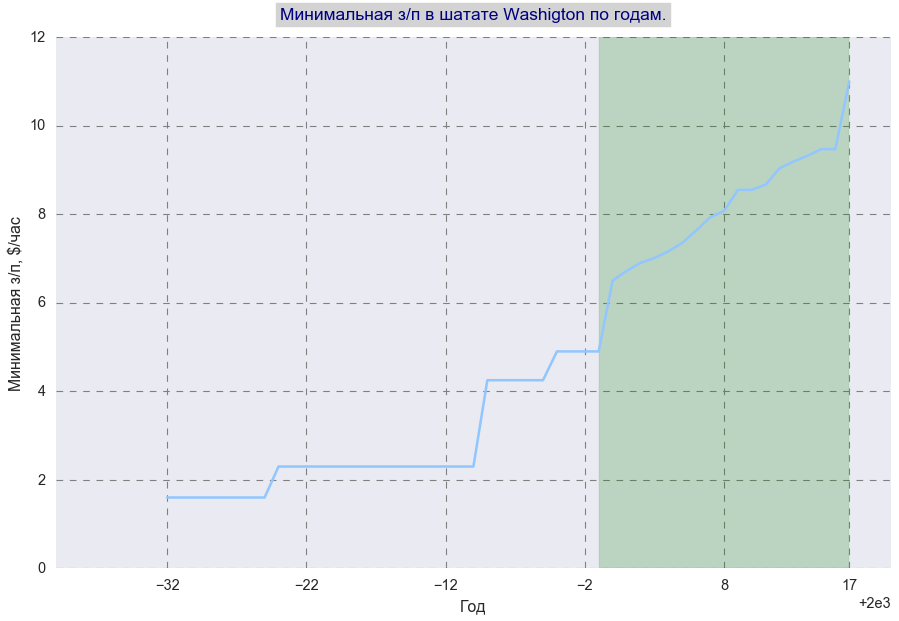

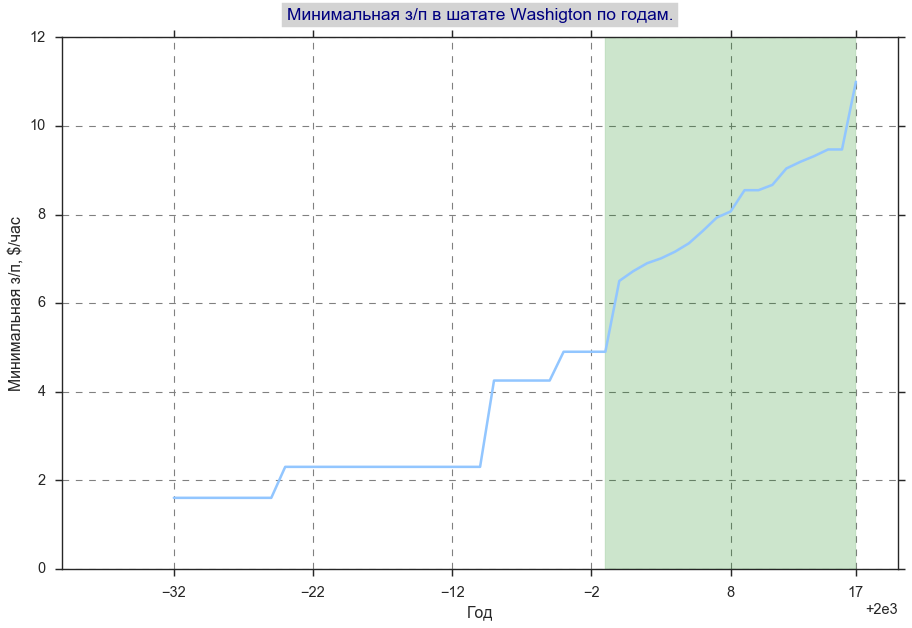

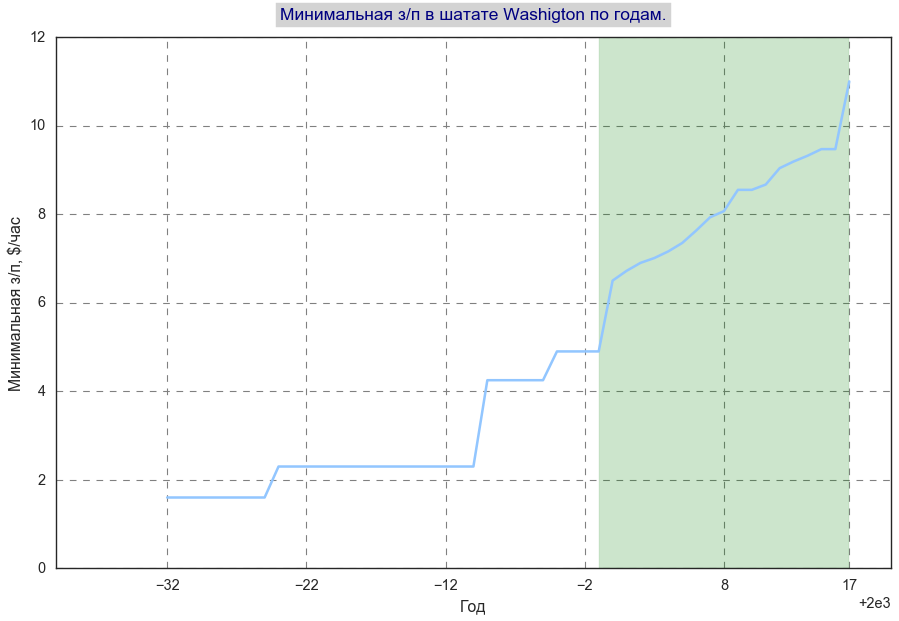

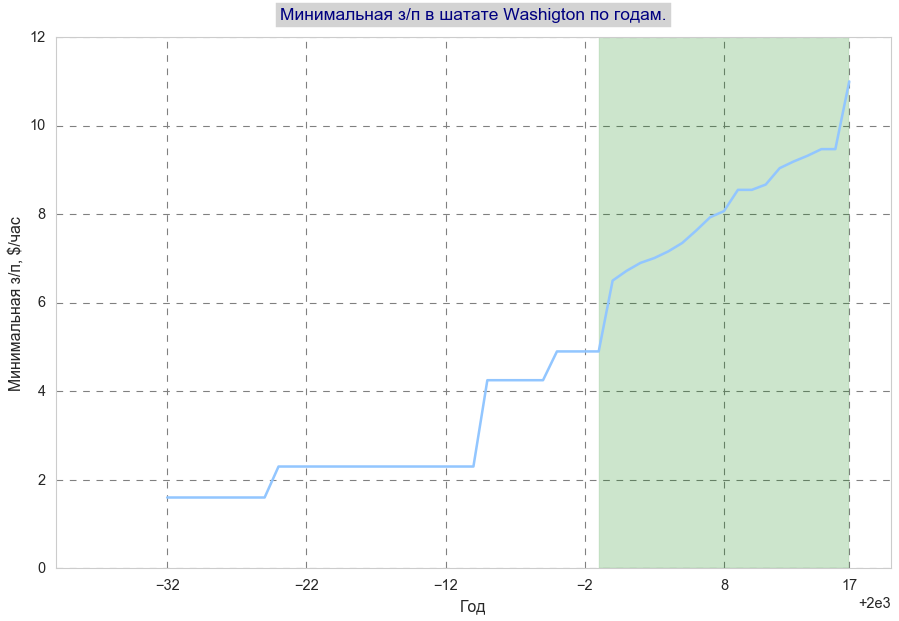

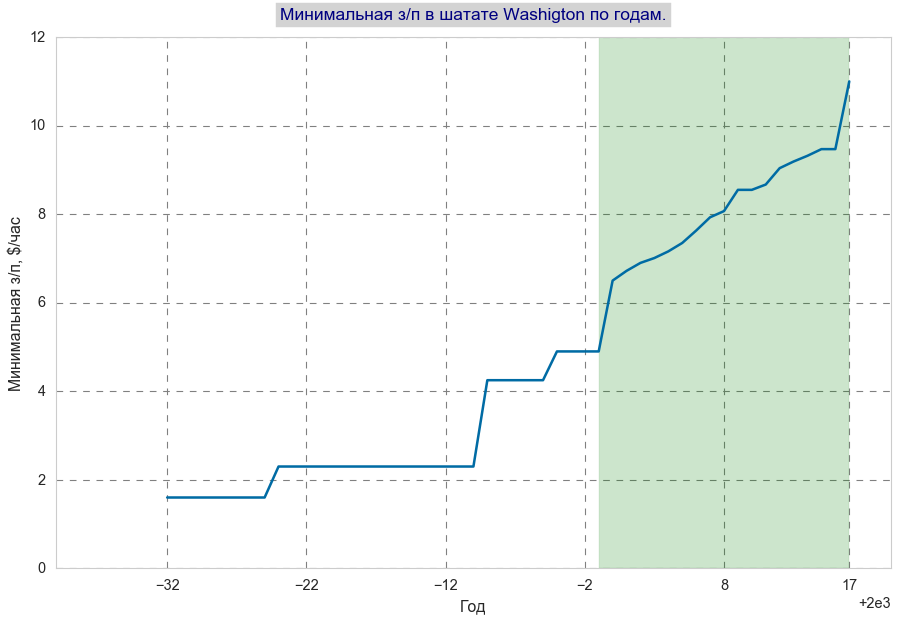

In [85]:
for style in plt.style.available:
    
    plt.style.use(style)

    data = df[df["State"] == "Washington"][["Year", "Salary"]]
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(data['Year'], data['Salary'], label='Washigton')
    ax.axvspan(xmin=1999, xmax=data['Year'].max(), color='green', alpha=0.2)


    ax.set_title('Минимальная з/п в шатате Washigton по годам.', pad=16, color = 'navy', backgroundcolor='lightgray')
    ax.set_xlabel('Год')
    ax.set_ylabel('Минимальная з/п, $/час')
    ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 10)) + [data['Year'].max()])
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.show()

In [86]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']